以下代码参考自网络
* https://blog.csdn.net/aicanghai_smile/article/details/79234172
* https://www.jianshu.com/p/9a5bce0de13f
* https://www.kaggle.com/c/titanic/data
经过少量修改

数据介绍：
* PassengerId:乘客ID
* Survived:是否获救
* Pclass:乘客等级
* Name:乘客姓名
* Sex:性别
* Age:年龄
* SibSp:堂兄弟妹个数
* Parch:父母与小孩个数
* Ticket:船票信息
* Fare:票价
* Cabin:客舱
* Embarked:登船港口


## 实验要求
请给部分代码加上注释

In [1]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data6374


In [2]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. All changes under this directory will be kept even after reset. Please clean unnecessary files in time to speed up environment loading.
!ls /home/aistudio/work

In [3]:
!pip install seaborn -i https://mirrors.aliyun.com/pypi/simple

Looking in indexes: https://mirrors.aliyun.com/pypi/simple

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
from IPython.display import display
%matplotlib inline
import seaborn as sns

In [5]:
#使用read_csv将train.csv和test.csv分别读到train和test两个dataframe里
train=pd.read_csv('./data/data6374/train.csv')
test=pd.read_csv('./data/data6374/test.csv')
display(train.head(n=1),test.head(n=1))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [6]:
train.info()
test.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


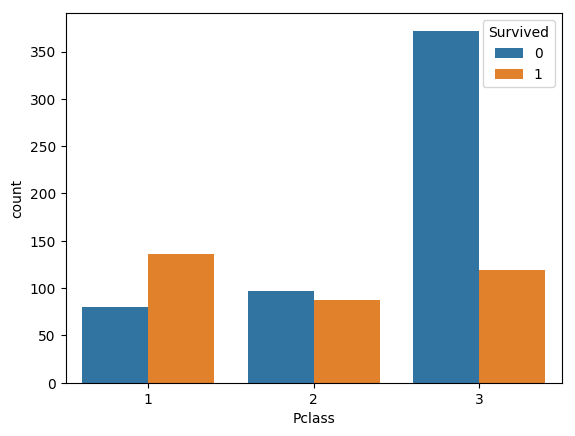

In [7]:
sns.countplot(x="Pclass", hue="Survived", data=train)  #使用countplot画出train中不同Pclass下生存和死亡人数的柱状图

## 请写出上一句代码所得的柱状图你自己的分析结论
社会阶层层级越高（1级最高），死亡率越低，存活率越高（层级二存活人数虽少，但是存活比例比层级三高）


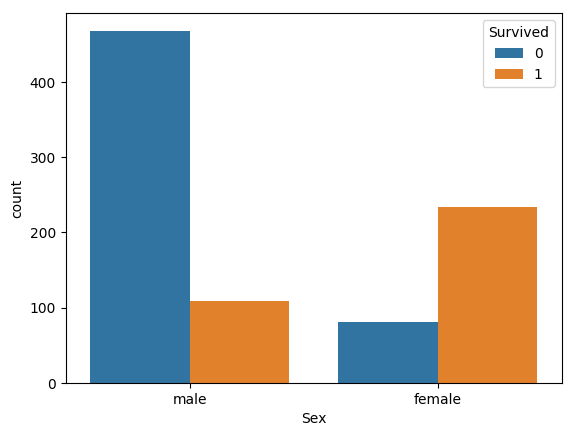

In [8]:
sns.countplot(x="Sex", hue="Survived", data=train)    #使用countplot画出train中不同性别下生存和死亡人数的柱状图

## 请写出上一句代码所得的柱状图你自己的分析结论
男性死亡人数高于女性，存活率低于女性

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

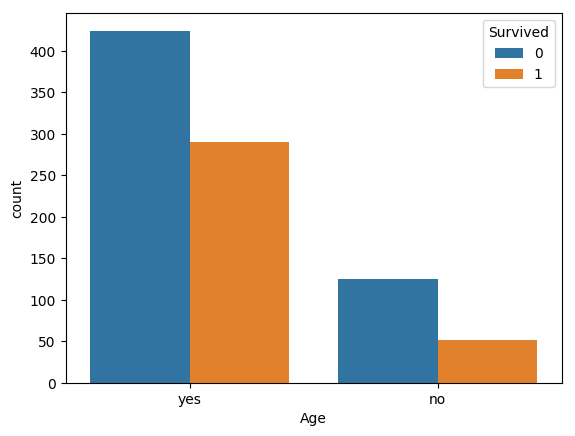

In [9]:
#以下代码不能在一次运行中反复执行，因为x已经被改过了
train['Age']=train['Age'].map(lambda x: 'yes' if 0<x<100 else 'no')   #有年龄信息和没有年龄信息是否和死亡与否有关
sns.countplot(x="Age",hue="Survived",data=train)

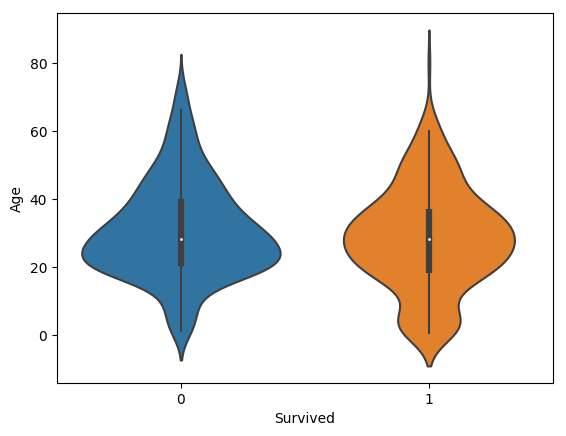

In [10]:
train = pd.read_csv('/home/aistudio/data/data6374/train.csv')
sns.violinplot(x="Survived", y="Age", data=train)       #画出小提琴图（violinplot）以分析生存和死亡的人的年龄分布

In [11]:
#给以下代码加注释
# 进行年龄特征分段转换
train['Age'] =train['Age'].map(lambda x: 'child' if x < 12 else 'youth' if x < 30 else 'adult' if x < 60 else 'old' if x < 75 else 'tooold' if x > 75 else 'null') 
#使用lambda表达式将age的数值变为child（<12）,youth(<30),adult(<60),old(<75),tooold(>=75),null(其他)）


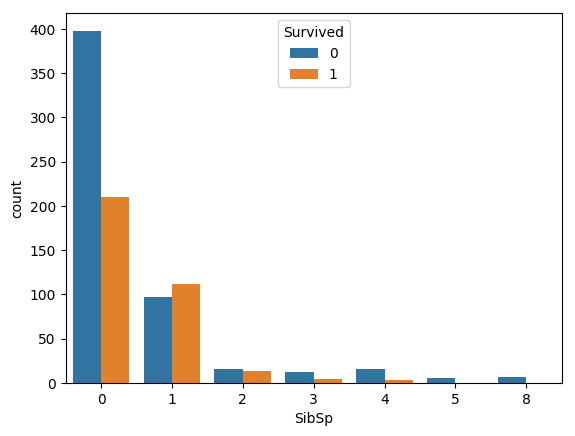

In [12]:
sns.countplot(x="SibSp", hue="Survived", data=train)    #使用countplot画出堂兄妹个数与是否生存的关系柱状图，横坐标为堂兄妹个数，纵坐标为生存和死亡的人数

In [13]:
# 从图中可以看到大部分人这一属性都为0，而为1，2的情况下貌似幸存大概率会增加，再大又会减小，把这个特征分为三部分
train['SibSp']=train['SibSp'].map(lambda x: 'small' if x<1 else 'middle' if x<3 else 'large')        

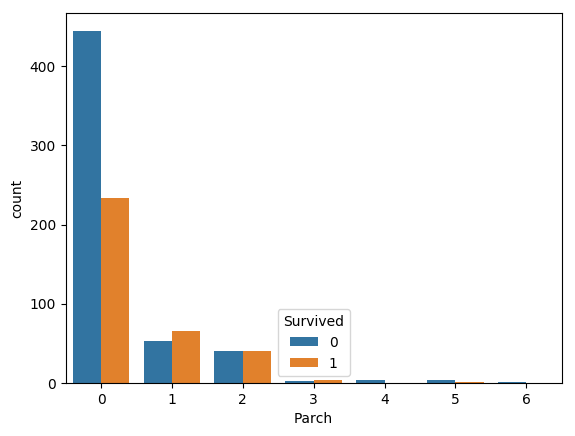

In [14]:
sns.countplot(x="Parch", hue="Survived", data=train)  #使用countplot画出‘Parch’父母以及小孩个数与是否生存的关系柱状图，横坐标为父母以及小孩个数，纵坐标为生存和死亡的人数

In [15]:
# 有父母孩子的比单独旅行的幸存率的确更高，同样把这个特征分为三部分
train['Parch']=train['Parch'].map(lambda x: 'small' if x<1 else 'middle' if x<4 else 'large')

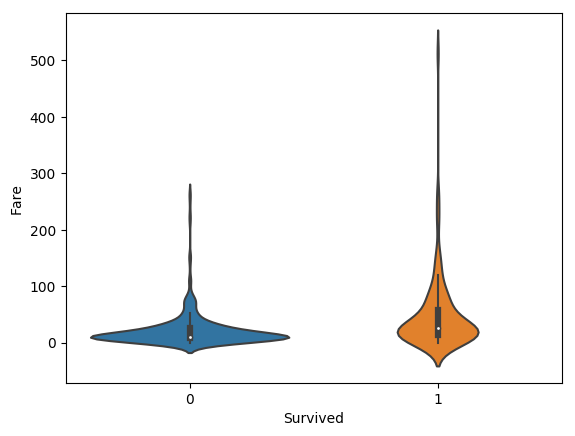

In [16]:
sns.violinplot(x='Survived',y='Fare',data=train)   #画出风琴图（violinplot）以分析船费Fare和生存的关系

## 请写出上一句代码所得的风琴图你自己的分析结论
船费在100以下时，幸存率很低，死亡人数比存活的多，船费在100-300之间，幸存率逐渐提高，300以上，全部存活，存活率100%

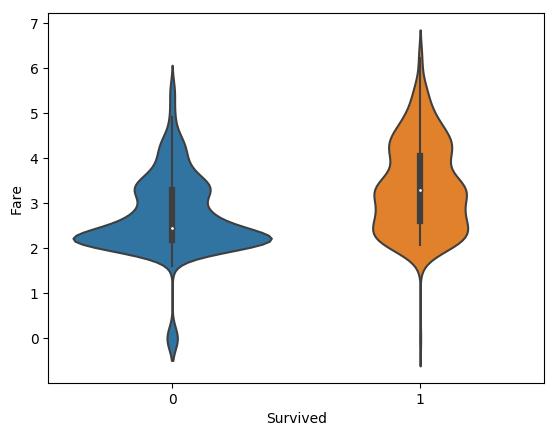

In [17]:
#train = pd.read_csv('/home/aistudio/data/data6374/train.csv')
train['Fare']=train['Fare'].map(lambda x:np.log(x+1)) #由于部分x为0，因此要+1   请写出这个地方为什么用log，不用log是什么样的
# 使用对数变换（如`np.log(x + 1)`）的主要原因是：
# 1.减少偏态：船费（`Fare`）的分布通常是右偏的，也就是说大部分数据集中在较低的值上，而少数值很高。对数变换可以将这种偏态减少，使数据分布更加接近正态分布，从而提高模型的性能。
# 2.处理极端值：如果不使用对数变换，极端高船费可能会对模型造成过大的影响。对数变换可以减少这些极端值的影响，因为对数增长的速度比线性增长慢。
# 3. 使得特征更具可解释性：对数变换后，特征的变化解释上更加直观。例如，`log(Fare)`的变化可以被理解为比例变化，而不是绝对变化。

# 如果不使用对数变换，`Fare`的分布可能会对模型训练产生负面影响，导致模型拟合不佳，预测结果不准确。尤其是在回归模型中，假设特征呈正态分布时，非正态分布的特征可能导致模型性能下降。
# 可视化时，原始的`Fare`分布可能会显示出更明显的偏态，而对数变换后分布会更加平滑。
sns.violinplot(x='Survived',y='Fare',data=train)

In [18]:
train['Fare']=train['Fare'].map(lambda x:'poor' if(x<2.5) else 'rich')  #使用lambda表达式将Fare的数值变为poor（<2.5）,rich(其他)）

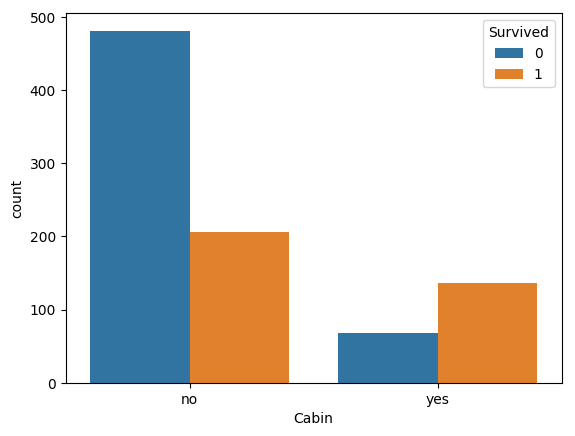

In [19]:

train['Cabin']=train['Cabin'].map(lambda x:'yes' if type(x)==str else 'no')  #使用lambda表达式将Cabin改为'yes'(type为str)，‘no’（type为其他））
sns.countplot(x="Cabin", hue ="Survived", data =train)

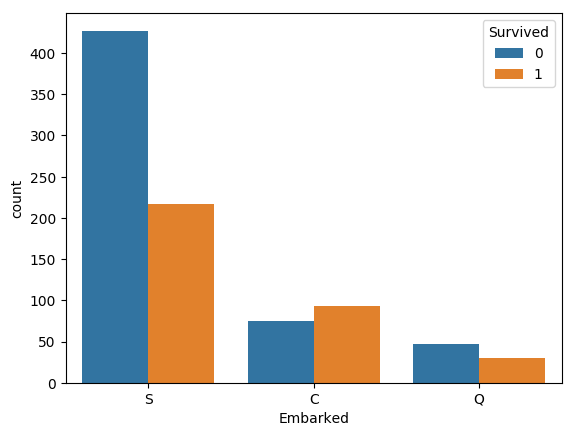

In [20]:
sns.countplot(x="Embarked",hue="Survived",data=train) # 观察'Embarked'乘客上船的港口和生存率的关系

In [21]:
train.dropna(axis=0,inplace=True) # 删除 Embarked特征中所有包含缺失值的行，修改原始数据框
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  889 non-null    int64 
 1   Survived     889 non-null    int64 
 2   Pclass       889 non-null    int64 
 3   Name         889 non-null    object
 4   Sex          889 non-null    object
 5   Age          889 non-null    object
 6   SibSp        889 non-null    object
 7   Parch        889 non-null    object
 8   Ticket       889 non-null    object
 9   Fare         889 non-null    object
 10  Cabin        889 non-null    object
 11  Embarked     889 non-null    object
dtypes: int64(3), object(9)
memory usage: 90.3+ KB


In [22]:
labels=train['Survived']
features = train.drop(['Survived','PassengerId','Name','Ticket'],axis=1)         # 从 train 数据框中删除 'Survived', 'PassengerId', 'Name', 'Ticket' 列，保留其他列作为特征
# 原因：
# 提取标签：Survived 列是模型的目标变量，用于训练和评估模型。
# 删除无关特征：PassengerId, Name, 和 Ticket 列不是预测模型所需的特征，因为它们不包含有用的信息或对生存率预测没有实际意义。

In [23]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    889 non-null    int64 
 1   Sex       889 non-null    object
 2   Age       889 non-null    object
 3   SibSp     889 non-null    object
 4   Parch     889 non-null    object
 5   Fare      889 non-null    object
 6   Cabin     889 non-null    object
 7   Embarked  889 non-null    object
dtypes: int64(1), object(7)
memory usage: 62.5+ KB


In [24]:
features = pd.get_dummies(features)   # 对 features 数据框中的分类变量进行独热编码，将其转换为数值型特征
# 为什么这么做：
# 处理分类变量：机器学习模型通常只能处理数值型数据，而分类变量（如性别、船舱等级等）需要转换成数值形式。独热编码通过为每个类别创建一个新的二进制特征来实现这一点。
# 避免信息损失：与其他编码方法（如标签编码）相比，独热编码避免了对类别顺序的错误假设（即不假定类别之间有任何顺序关系），从而保留了所有类别的信息。

encoded = list(features.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

22 total features after one-hot encoding.


In [25]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Pclass        889 non-null    int64
 1   Sex_female    889 non-null    uint8
 2   Sex_male      889 non-null    uint8
 3   Age_adult     889 non-null    uint8
 4   Age_child     889 non-null    uint8
 5   Age_null      889 non-null    uint8
 6   Age_old       889 non-null    uint8
 7   Age_tooold    889 non-null    uint8
 8   Age_youth     889 non-null    uint8
 9   SibSp_large   889 non-null    uint8
 10  SibSp_middle  889 non-null    uint8
 11  SibSp_small   889 non-null    uint8
 12  Parch_large   889 non-null    uint8
 13  Parch_middle  889 non-null    uint8
 14  Parch_small   889 non-null    uint8
 15  Fare_poor     889 non-null    uint8
 16  Fare_rich     889 non-null    uint8
 17  Cabin_no      889 non-null    uint8
 18  Cabin_yes     889 non-null    uint8
 19  Embarked_C    889 non-null   

In [26]:

#对test中的'Age','SibSp'，'Parch'特征进行分段分类
test['Age'] =test['Age'].map(lambda x: 'child' if x < 12 else 'youth' if x < 30 else 'adult' if x < 60 else 'old' if x < 75 else 'tooold' if x > 75 else 'null') 
test['SibSp']=test['SibSp'].map(lambda x: 'small' if x<1 else 'middle' if x<3 else 'large')  
test['Parch']=test['Parch'].map(lambda x: 'small' if x<1 else 'middle' if x<4 else 'large')
#均值补齐'Fare'特征值并作对数转换和分类，下面缺了两句
test.Fare.fillna(test['Fare'].mean(), inplace=True)
test['Fare']=test['Fare'].map(lambda x:np.log(x+1))
test['Fare']=test['Fare'].map(lambda x:'poor' if(x<2.5) else 'rich')
#按'Cabin'是否缺损对test中的Cabin处理
test['Cabin']=test['Cabin'].map(lambda x:'yes' if type(x)==str else 'no')

#删除不需要的特征并进行独热编码
Id=test['PassengerId']
test = test.drop(['PassengerId','Name','Ticket'],axis=1)
test = pd.get_dummies(test)
encoded = list(test.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))
test.info()

22 total features after one-hot encoding.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Pclass        418 non-null    int64
 1   Sex_female    418 non-null    uint8
 2   Sex_male      418 non-null    uint8
 3   Age_adult     418 non-null    uint8
 4   Age_child     418 non-null    uint8
 5   Age_null      418 non-null    uint8
 6   Age_old       418 non-null    uint8
 7   Age_tooold    418 non-null    uint8
 8   Age_youth     418 non-null    uint8
 9   SibSp_large   418 non-null    uint8
 10  SibSp_middle  418 non-null    uint8
 11  SibSp_small   418 non-null    uint8
 12  Parch_large   418 non-null    uint8
 13  Parch_middle  418 non-null    uint8
 14  Parch_small   418 non-null    uint8
 15  Fare_poor     418 non-null    uint8
 16  Fare_rich     418 non-null    uint8
 17  Cabin_no      418 non-null    uint8
 18  Cabin_yes     418 non-null  

In [27]:
!pip install xgboost -i https://mirrors.aliyun.com/pypi/simple

Looking in indexes: https://mirrors.aliyun.com/pypi/simple

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score,roc_auc_score
from time import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier

In [29]:
def fit_model(alg,parameters):
    X=features
    y=labels # 由于数据较少，使用全部数据进行网格搜索
    scorer = make_scorer(roc_auc_score) # 使用 roc_auc_score 作为评分标准
    grid=GridSearchCV(alg,parameters,scoring=scorer,cv=5)   #自学GridSearchCV及其他自动调参方法，了解他们的优缺点并在此简单列出
    # GridSearchCV
    # 优点： 简单易用，适用于小型数据集和模型;可以全面搜索参数空间，确保找到最优组合。
    # 缺点：计算成本高，对于大数据集或参数空间较大时，训练时间较长;可能会忽略一些最佳参数组合，特别是在
    # RandomizedSearchCV
    # 优点：随机抽样参数组合，效率高，适用于大参数空间；能发现较好的参数组合。
    # 缺点：可能会错过全局最优解，结果不如网格搜索全面。
    # Bayesian Optimization
    # 优点：通过概率模型逐步优化参数，效率高，能智能选择下一个测试点。
    # 缺点：实现较复杂，需要较多的计算资源和时间。
    # Hyperband
    # 优点：结合了随机搜索和早期停止，能快速找到优秀的超参数组合。
    # 缺点：实现较复杂，对某些问题的性能可能不稳定。
    # Genetic Algorithms
    # 优点：模拟自然选择过程，能探索复杂的搜索空间。
    # 缺点：需要设置多个超参数，计算成本高，收敛速度可能慢。
    start=time() # 计时
    grid=grid.fit(X,y)# 模型训练
    end=time()
    t=round(end-start,3)
    print(grid.best_params_) # 输出最佳参数
    print ('searching time for {} is {} s'.format(alg.__class__.__name__,t)) #输出搜索时间
    return grid

In [30]:
#列出需要使用的算法
alg1=DecisionTreeClassifier(random_state=29)
alg2=SVC(probability=True,random_state=29)  #由于使用roc_auc_score作为评分标准，需将SVC中的probability参数设置为True
alg3=RandomForestClassifier(random_state=29)
alg4=AdaBoostClassifier(random_state=29)
alg5=KNeighborsClassifier(n_jobs=-1)
alg6=XGBClassifier(random_state=29,n_jobs=-1)


In [31]:
#列出需要调整的参数范围
parameters1={'max_depth':range(1,10),'min_samples_split':range(2,10)}
parameters2 = {"C":range(1,20), "gamma": [0.05,0.1,0.15,0.2,0.25]}
parameters3_1 = {'n_estimators':range(10,200,10)}
parameters3_2 = {'max_depth':range(1,10),'min_samples_split':range(2,10)}  #搜索空间太大，分两次调整参数
parameters4 = {'n_estimators':range(10,200,10),'learning_rate':[i/10.0 for i in range(5,15)]}
parameters5 = {'n_neighbors':range(2,10),'leaf_size':range(10,80,20)  }
parameters6_1 = {'n_estimators':range(10,200,10)}
parameters6_2 = {'max_depth':range(1,10),'min_child_weight':range(1,10)}
parameters6_3 = {'subsample':[i/10.0 for i in range(1,10)], 'colsample_bytree':[i/10.0 for i in range(1,10)]}#搜索空间太大，分三次调整参数


请把模型调用部分的代码改成循环形式

In [32]:
clf1=fit_model(alg1,parameters1)

{'max_depth': 4, 'min_samples_split': 2}
searching time for DecisionTreeClassifier is 1.323 s


In [33]:
clf2=fit_model(alg2,parameters2)

In [34]:
clf3_m1=fit_model(alg3,parameters3_1)

In [35]:
alg3=RandomForestClassifier(random_state=29,n_estimators=180)
clf3=fit_model(alg3,parameters3_2)

In [36]:
clf4=fit_model(alg4,parameters4)

In [37]:
clf5=fit_model(alg5,parameters5)

In [1]:
clf6_m1=fit_model(alg6,parameters6_1)

In [ ]:
alg6=XGBClassifier(n_estimators=140,random_state=29,n_jobs=-1)
clf6_m2=fit_model(alg6,parameters6_2)

In [ ]:
alg6=XGBClassifier(n_estimators=140,max_depth=4,min_child_weight=5,random_state=29,n_jobs=-1)
clf6=fit_model(alg6,parameters6_3)

In [ ]:
def save(clf,i):
    pred=clf.predict(test)
    sub=pd.DataFrame({ 'PassengerId': Id, 'Survived': pred })
    sub.to_csv("res_tan_{}.csv".format(i), index=False)


In [ ]:

i=1
for clf in [clf1,clf2,clf3,clf4,clf5,clf6]:
    save(clf,i)
    i=i+1